# Introducción

En la ciudad de Los Ángeles, se ha decidido emprender un proyecto innovador: abrir un pequeño café atendido por robots. Este concepto vanguardista promete atraer la atención de los amantes de la tecnología y revolucionar la experiencia tradicional de un café. Sin embargo, debido a los costos significativos, se necesita atraer inversionistas para asegurar el éxito a largo plazo.

Este informe analiza las condiciones actuales del mercado de locales de comida en Los Ángeles, evaluando la viabilidad y sostenibilidad del café robótico en el tiempo.  Está basado en fuentes abiertas sobre restaurantes en LA.

# Descripción de los datos

Tabla `rest_data`:

- object_name — nombre del establecimiento
- chain — establecimiento que pertenece a una cadena (TRUE/FALSE)
- object_type — tipo de establecimiento
- address — dirección
- number — número de asientos

# Pauta de trabajo

Para completar el análisis de mercado exitosamente se ha definido la siguiente lista de acciones y preguntas que serán resueltas en el análisis posterior:

- Investigar las proporciones de los distintos tipos de establecimientos.
- Investigar las proporciones de los establecimientos que pertenecen a una cadena y de los que no. 
- ¿Qué tipo de establecimiento es habitualmente una cadena?
- ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un - montón de asientos?
- Determinar el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.
- Trazar un gráfico de las diez mejores calles por número de restaurantes.
- Encontrar el número de calles que solo tienen un restaurante.
- Para las calles con muchos restaurantes, analizar la distribución del número de asientos y detectar tendencias.

## Pre-análisis de los datos

Esta fase contempla todos los preparativos, importación de librerías, limpieza, etc. que se deben realizar antes de empezar con el análisis.

### Inicialización

Se procede a importar las librerías para el análisis y visualización de los datos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Se importan todas las librerias exitosamente.

### Carga de datos

Ahora, se montará el dataset usando `read_csv`.

In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

Una vez montado, se previsualiza el contenido.

In [3]:
rest_data.info()
rest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Se previsualizan los datos, encontrando valores ausentes en la columna `chain`, serán resueltos en la siguiente fase.

### Preparar datos

Una vez cargado el dataset e identificados los problemas principales, se empiezan a limpiar los datos. Se empieza por la búsqueda de filas duplicadas.

In [4]:
rest_data.duplicated().sum()

0

Se comprueba que en el dataframe no existen filas duplicadas que trabajar.

Se procede a trabajar los valores ausentes descubiertos anteriormente.

In [5]:
rest_data['chain'].fillna('Unknown', inplace=True)

La limpieza termina exitosamente.

## Análisis de los datos

Ya terminado el pre-procesamiento se puede empezar con el análisis, donde se responderán y resolverán todas las dudas y tareas establecidas.

### Proporciones de los distintos tipos de establecimientos

Al tratarse de proporciones, se toma la decisión de crear un gráfico circular, sin embargo, primero se visualizarán los datos que irán en el gráfico.

In [6]:
rest_data['object_type'].value_counts().reset_index()

,index,object_type
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


Una vez vistos, se puede construir el gráfico, definiendo las etiquetas y la porción que se desea resaltar.

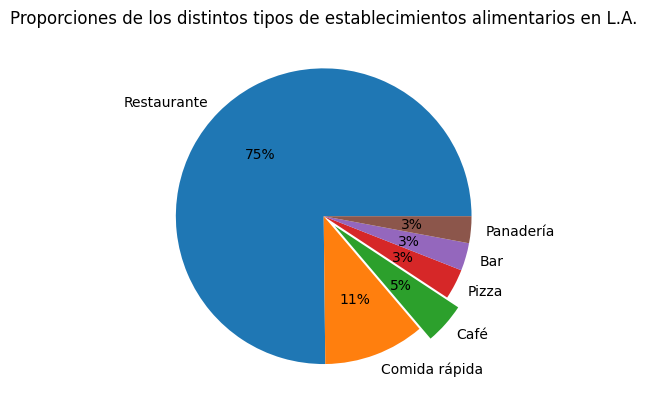

In [7]:
labels = ['Restaurante', 'Comida rápida', 'Café', 'Pizza', 'Bar', 'Panadería']
explode = [0, 0, 0.1, 0, 0, 0]
plt.pie(rest_data['object_type'].value_counts(), autopct="%0.0f%%", labels=labels, explode=explode)
plt.title('Proporciones de los distintos tipos de establecimientos alimentarios en L.A.');

__Los restaurantes abarcan 3/4 del total__ en los locales alimentarios de Los Angeles, seguidos de los locales de comida rápida y __las cafeterías,  el grupo de interés, que componen un 5% del mercado__.

### Proporciones de los establecimientos que pertenecen a una cadena 

Al tratarse de proporciones nuevamente, se vuelve a elegir el gráfico circular. Se procede a la visualización de los datos que irán en el gráfico.

In [8]:
rest_data['chain'].value_counts()

False      5972
True       3676
Unknown       3
Name: chain, dtype: int64

Se decide excluir los valores `Unknown` por no ser relevantes para obtener la información solicitada. Se construye el gráfico.

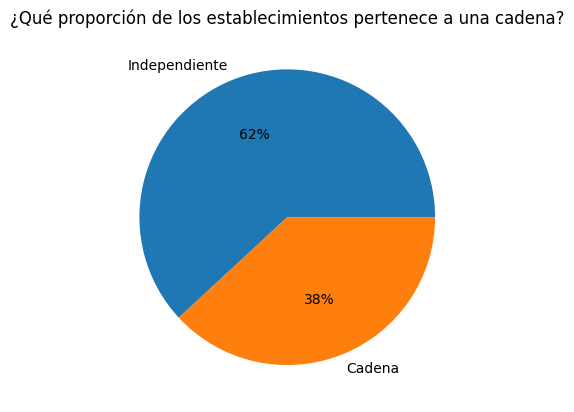

In [9]:
chain = rest_data[rest_data['chain'] != 'Unknown']
labels = ['Independiente', 'Cadena']
plt.pie(chain['chain'].value_counts(), autopct="%0.0f%%", labels=labels)
plt.title('¿Qué proporción de los establecimientos pertenece a una cadena?');

Una mayoría importante de locales alimentarios en Los Angeles __no pertenece a una cadena__.

### ¿Qué tipo de establecimiento es habitualmente una cadena?

Esta pregunta puede ser abordada desde varias aristas, por lo que se trazarán una serie de gráficos y luego se escojerán los  que revelen información más importante para ser mostrados en el informe. Se empieza con un __gráfico de barras con la cantidad de establecimientos por tipo y si son cadena o no__.

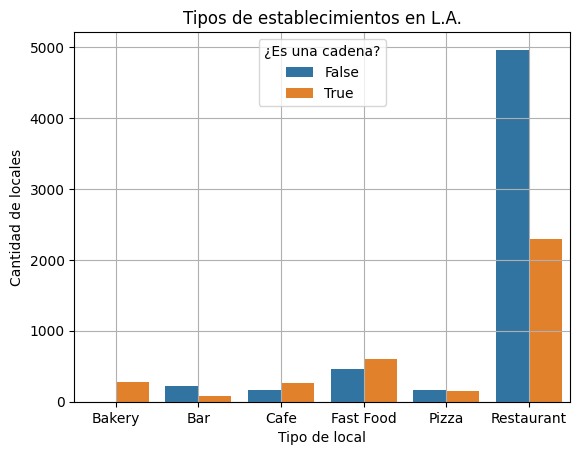

In [10]:
chain_t = chain.groupby(['object_type', 'chain'])['id'].count().reset_index()
sns.barplot(x='object_type', y='id', data=chain_t, hue='chain')
plt.title('Tipos de establecimientos en L.A.')
plt.legend(title='¿Es una cadena?')
plt.ylabel('Cantidad de locales')
plt.xlabel('Tipo de local')
plt.grid();

En L.A. __todas las panaderías pertenecen a cadenas__ y el tipo de local de posee mas locales de cadena es el restaurant. Se calculará el porcentaje de cafeterías que son cadenas.

In [11]:
cafe = chain_t[chain_t['object_type'] == 'Cafe']
total = (169 + 266)
porcentaje = (266 / total) * 100
print(porcentaje)
cafe

61.149425287356316


,object_type,chain,id
3,Cafe,False,169
4,Cafe,True,266


__El 61% de las cafeterías pertenece a una cadena__.

Ahora se indagará en las proporciones de tipos de restaurante que conforman las cadenas, se previsualizan los datos.

In [12]:
chain_type = chain[chain['chain'] == True]
chain_type['object_type'].value_counts().reset_index()

,index,object_type
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


Se procede a construir el gráfico circular con sus etiquetas y resaltando la porción que corresponde.

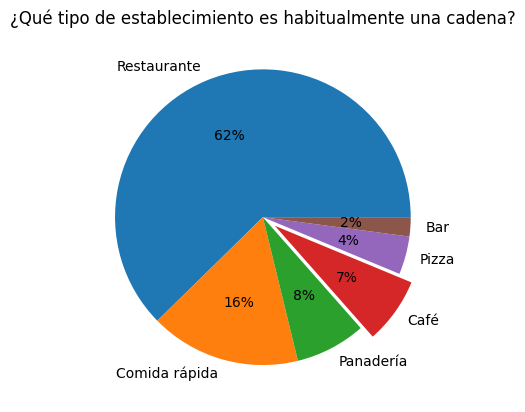

In [13]:
labels = ['Restaurante', 'Comida rápida', 'Panadería', 'Café', 'Pizza', 'Bar']
explode = [0, 0, 0, 0.1, 0, 0]
plt.pie(chain_type['object_type'].value_counts(), autopct="%0.0f%%", labels=labels, explode=explode)
plt.title('¿Qué tipo de establecimiento es habitualmente una cadena?');

Confirmando la información del gráfico de barras, el tipo de local que mas negocios de cadena tiene en L.A. es el restaurante, con más de la mitad de la cantidad total de locales cadena.

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

Para responder esta pregunta, primero se estudiará cuántos locales tienen algunas de las cadenas más conocidas. Se descubre que en la lista aparece `KENTUCKY FRIED CHICKEN` y `KFC`, por lo que se corrige el duplicado implícito.

In [14]:
rest_data['object_name'].replace({'KENTUCKY FRIED CHICKEN': 'KFC'}, inplace=True)
rest_data['object_name'].value_counts().head(25).reset_index()

,index,object_name
0,THE COFFEE BEAN & TEA LEAF,47
1,SUBWAY,31
2,KFC,23
3,DOMINO'S PIZZA,15
4,WABA GRILL,14
5,MCDONALD'S,13
6,TRIMANA,13
7,PAPA JOHN'S PIZZA,12
8,STARBUCKS,12
9,YOGURTLAND,12


Se seleccionarán algunas de las cadenas más importantes para filtrar la columna de direcciones, entre ellas `STARBUCKS` ya que es una cafetería emblemática.

In [15]:
print('Cantidad de SUBWAY:',len(rest_data[rest_data['object_name'].str.contains("SUBWAY")]['object_name']))
print('Cantidad de THE COFFEE BEAN & TEA LEAF:',len(rest_data[rest_data['object_name'].str.contains("THE COFFEE BEAN & TEA LEAF")]['object_name']))
print('Cantidad de KFC:',len(rest_data[rest_data['object_name'].str.contains("KFC")]['object_name']))
print("Cantidad de DOMINO'S PIZZA:",len(rest_data[rest_data['object_name'].str.contains("DOMINO'S PIZZA")]['object_name']))
print('Cantidad de STARBUCKS:',len(rest_data[rest_data['object_name'].str.contains("STARBUCKS")]['object_name']))

Cantidad de SUBWAY: 152
Cantidad de THE COFFEE BEAN & TEA LEAF: 55
Cantidad de KFC: 28
Cantidad de DOMINO'S PIZZA: 30
Cantidad de STARBUCKS: 129


Se descubre que __las cadenas tienden a tener muchos locales en una sola ciudad, las más grandes hasta más de 100__. Ahora se analizará la cantidad de asientos promedio de los locales cadena.

Promedio de asientos local cadena: 39.69
Promedio de asientos local no cadena 46.17



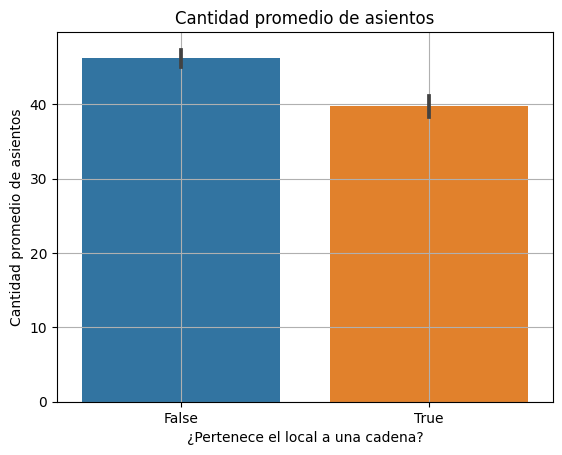

In [16]:
print('Promedio de asientos local cadena:' ,chain[chain['chain'] == True]['number'].mean().round(2))
print('Promedio de asientos local no cadena', chain[chain['chain'] == False]['number'].mean().round(2))
print()
sns.barplot(x='chain', y='number', data=chain)
plt.title('Cantidad promedio de asientos')
plt.xlabel('¿Pertenece el local a una cadena?')
plt.ylabel('Cantidad promedio de asientos')
plt.grid();

Se descubre que los locales de cadenas tienen 6.5 asientos menos que un local independiente en promedio. Ahora se analizará la distribución de número de asientos usando un histograma.

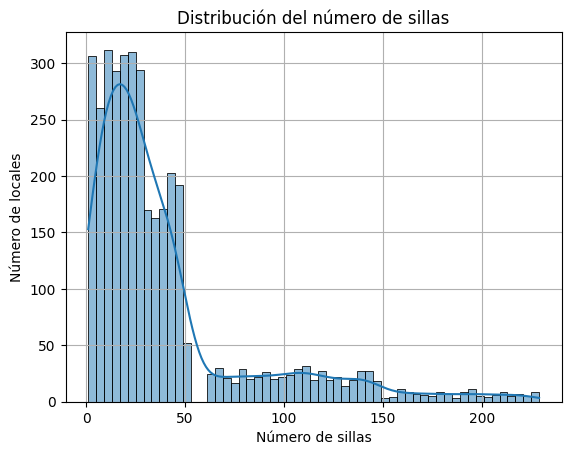

In [17]:
chain_true = chain[chain['chain'] == True]
sns.histplot(x='number', data=chain_true, kde=True)
plt.title('Distribución del número de sillas')
plt.xlabel('Número de sillas')
plt.ylabel('Número de locales')
plt.grid();

Se observa que la gran mayoría de locales de cadenas tienen menos de 50 asientos. La proporción de locales que supera los 50 asientos es muy baja. Se trazarán gráficos de caja para comparar los cuartiles de los datos.

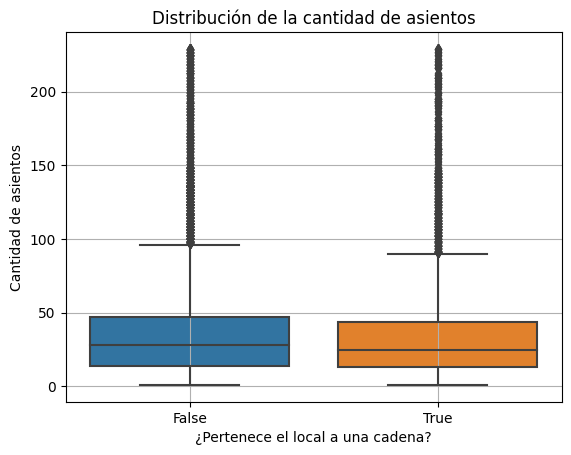

In [18]:
sns.boxplot(y='number', x='chain', data=chain)
plt.title('Distribución de la cantidad de asientos')
plt.xlabel('¿Pertenece el local a una cadena?')
plt.ylabel('Cantidad de asientos')
plt.grid();

Se observan distribuciones parecidas, la de locales independientes levemente por encima de la de cadenas. A este punto se confirma que __las cadenas son caracterizadas por tener muchos locales repartidos en la ciudad con pocos asientos cada uno__.

### Promedio de número de asientos para cada tipo de restaurante

Para graficar las diferencias en el número promedio de asientos por tipo de local, se construirá un gráfico de barras. Se priorizará rescatar números clave para mostrar en la presentación.

48.048807390045496
25.0


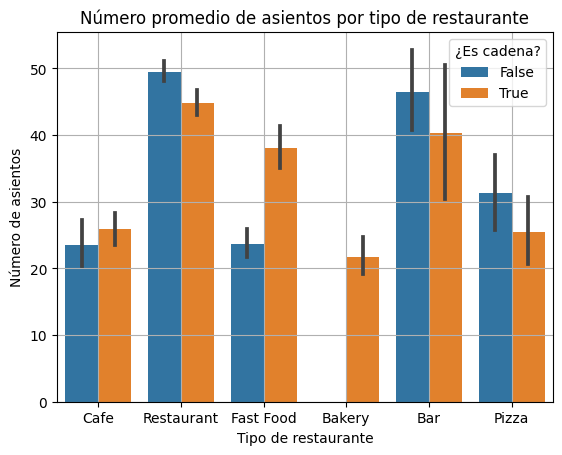

In [19]:
sns.barplot(x='object_type', y='number', data=chain, hue='chain')
plt.title('Número promedio de asientos por tipo de restaurante')
plt.ylabel('Número de asientos')
plt.xlabel('Tipo de restaurante')
plt.legend(title='¿Es cadena?')
plt.grid();
print(chain[chain['object_type'] == 'Restaurant']['number'].mean())
print(chain[chain['object_type'] == 'Cafe']['number'].mean())

__Los restaurantes son los locales que tienen, en promedio, mayor número de asientos__ (48.8 asientos por local), seguidos de cerca por los bares, las cafeterías, en cambio, están en el penúltimo puesto (25 asientos por local). 

Se analizará la distribución con gráficos de caja.

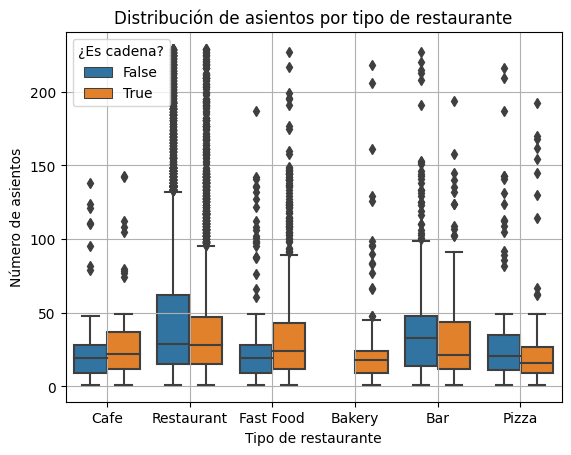

In [20]:
sns.boxplot(y='number', x='object_type',hue='chain', data=chain)
plt.title('Distribución de asientos por tipo de restaurante')
plt.ylabel('Número de asientos')
plt.xlabel('Tipo de restaurante')
plt.legend(title='¿Es cadena?')
plt.grid();

Se observa que la única caja que traspasa los 50 asientos es la de los restaurantes independientes, esto significa que __más de un 25% de los restaurantes independientes superan la barrera de los 50 asientos por local__.

### Las diez mejores calles por número de restaurantes.

Para obtener una columna que solo contenga los nombres de las calles se deberá separar el nombre de la calle, de la numeración del local, usando expresiones regulares.

In [21]:
rest_data['street_name'] = rest_data['address'].str.extract(r'^\d+\s+(.+?)(?:\s+\d+)?$', expand=False)
rest_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


Se consigue realizar una separación de los números (con sus espacios) al inicio y al final de la dirección, se guardan en la columna `street_name`. Se procede a rescatar las 10 calles con más locales para ser graficadas.

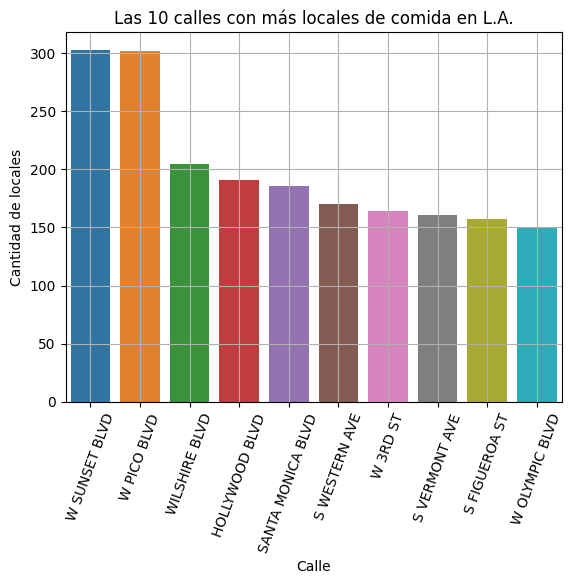

In [22]:
streets = rest_data.groupby('street_name')['id'].count().sort_values(ascending=False).head(10).reset_index()
sns.barplot(y='id', x='street_name', data=streets, ci=False)
plt.xticks(rotation=70)
plt.ylabel('Cantidad de locales')
plt.xlabel('Calle')
plt.title('Las 10 calles con más locales de comida en L.A.')
plt.grid();

Sunset Blvd y Pico Blvd son las calles con mas locales, __estas calles cuentan con cerca de 300 locales de comida cada una, el resto de calles del top rondan en los 150 locales por calle__.

### Número de calles que solo tienen un restaurante

Mediante una función se extraerá el número de calles que tienen un solo local de comida de las que tienen más de uno, para ser posteriormente graficado. Se rescatarán también valores clave para presentar en el informe.

1714
588


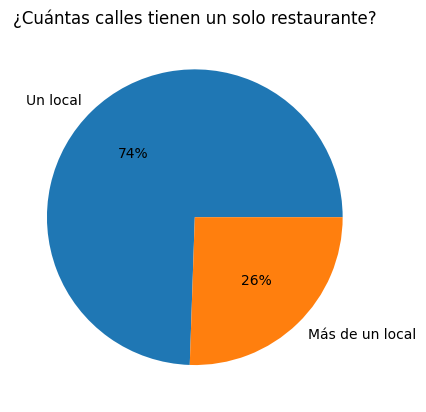

In [23]:
streets_tr = rest_data.groupby('street_name')['id'].count().sort_values(ascending=False).reset_index()

def one(row):
    stid = row['id']
    if stid == 1:
        return True
    else:
        return False
    
streets_tr['category'] = streets_tr.apply(one, axis=1)

labels = ['Un local', 'Más de un local']
plt.pie(streets_tr['category'].value_counts(), autopct="%0.0f%%", labels=labels)
plt.title('¿Cuántas calles tienen un solo restaurante?');
print(len(streets_tr[streets_tr['category'] == True]))
print(len(streets_tr[streets_tr['category'] == False]))

Se descubre que __un 80% del total de calles que tienen locales de comida, tiene un solo local instalado__.

### Análisis de la distribución del número de asientos para calles con muchos locales

Para obtener estos datos se filtrarán las calles que tengan más de 50 locales de comida. Finalmente se graficará la distribución de número de asientos de estos locales.

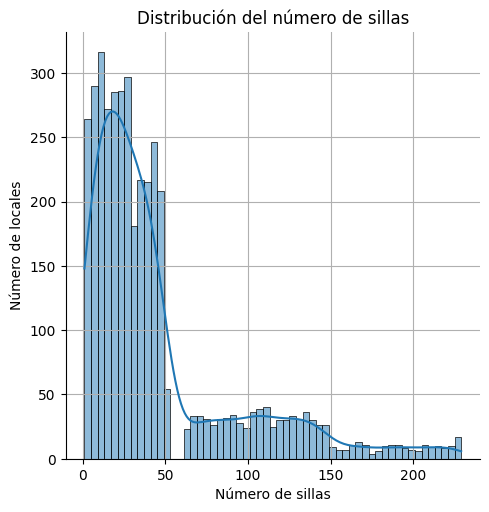

In [24]:
streets_hr = rest_data.groupby('street_name')['id'].count().sort_values(ascending=False).reset_index() #Creación del filtro
streets_hr = streets_hr[streets_hr['id'] > 50]
st_filter = streets_hr['street_name']

result = rest_data[rest_data['street_name'].isin(st_filter)] #Aplicación del filtro
sns.displot(x='number', data=result, kde=True)
plt.title('Distribución del número de sillas')
plt.xlabel('Número de sillas')
plt.ylabel('Número de locales')
plt.grid();

__Una gran mayoría de locales tiene menos de 50 sillas__. Esto probablemente sea debido a que estas calles están llenas de cadenas (son distribuciones similares) y/o a que los locales independientes ubicados en estas calles deben ser pequeños por sus altos costos de suelo/arriendo.

## Conclusiones

Esta es la lista de conclusiones que se rescatará para la presentación:

- Los restaurantes abarcan la mayor parte del mercado con un 75%, __las cafeterías son el 5%__.
- __El 62%  de los locales comerciales de comida pertenecen a cadenas y el 61%  de las cafeterías también lo es__.
- Las cadenas se caracterizan por tener __varios locales repartidos en la ciudad con pocos asientos cada uno__.
- __Sunset Blvd y Pico Blvd tienen cerca de 300 locales de comida cada una__. Seguidas de calles que tienen alrededor de 150 locales cada una.
- El local con mas asientos en promedio es el restaurant con  48, __una cafetería promedio tiene 25 asientos__.
- La distribución de asientos en negocios de calles con hartos locales __es muy parecida a la distribución de una cadena__. Puede deberse a que son calles caras para construir y arrendar y/o a que están llenas de locales cadena.

### ¿Crear una cadena?

Teniendo claro el panorama general del mercado de locales de cómida en Los Angeles, revisaremos algunos hechos clave para la eventual creación de una cadena.

- __Ventajas__: El costo inicial es mayor al de un local independiente. por lo tanto es un riesgo mayor. Se deberá invertir en robots, mantenimiento y altas cantidad de energía eléctrica para muchas ubicaciones.

- __Desventajas__: Empezar una cadena es diversificar el riesgo en cuato a la elección del lugar. En lugar de invertir todo en un lugar grande y tener la posibilidad de fracasar por una ubicación, una cadena disminuye drásticamente esa probabilidad. Una cadena también facilita percepción de una marca asociada a la cafetería robotica y también es el estándar en cuanto a cafeterías.

## Presentación

Se podrá ver la presentación en el siguiente [enlace.](https://drive.google.com/file/d/1ZfzhCcj1VAU_WFkPE3Lbl-1MF1lj73eE/view?usp=sharing)